In [1]:
#importing some libraries
import numpy as np
import matplotlib.pyplot as plt
import math as math
from scipy.special import factorial
import scipy.stats as ss
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from tabulate import tabulate

In [2]:
# defining chi square function to test fits for question 6
def chi_square(y_measured, y_expected,errors):
    return np.sum( np.power((y_measured - y_expected),2) / np.power(errors,2) )
# define chi square reduced
def chi_square_reduced(y_measured,y_expected,errors,number_parameters):
    return chi_square(y_measured,y_expected,errors)/(len(y_measured - number_parameters))

### Question 1

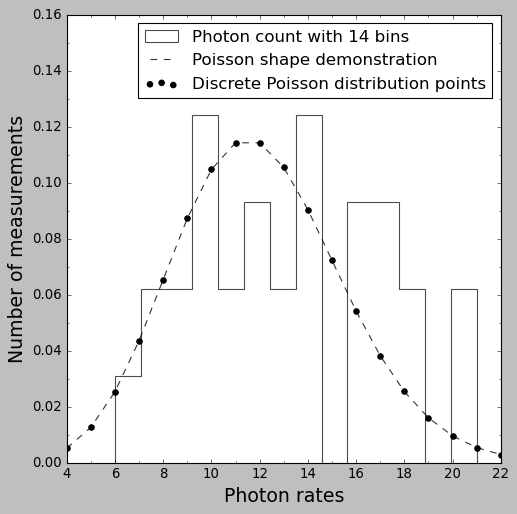

In [3]:
# values for histogram
photon_count_rate = np.array([13,17,18,14,11,8,21,18,9,12,9,17,14,6,10,16,16,11,10,12,8,20,14,10,14,17,13,16,12,10])
N_measurements = len(photon_count_rate)
mean = 12

# call poisson function
x = np.arange(4,23,1)
P_dist = ss.poisson.pmf(x,mu=mean)

# plotting mechanics
plt.style.use("classic")
tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
text = 17
legendfont=15

# plotting values and figure business
fig,ax0 = plt.subplots(ncols=1,nrows=1,figsize=(7,7))
ax0.hist(photon_count_rate,bins=14,density=True,histtype="step",color='k',alpha=0.7,label='Photon count with 14 bins')
ax0.plot(x,P_dist,ls='--',color='k',alpha=0.8,label='Poisson shape demonstration')
ax0.scatter(x,P_dist,s=24,color='k',label='Discrete Poisson distribution points')
ax0.set_xlabel('Photon rates',fontsize=text)
ax0.set_ylabel('Number of measurements',fontsize=text)
#past this point its fancy plotting mechanics
ax0.legend(loc='upper right',fontsize=legendfont)
ax0.set_xlim(4,22)
ax0.set_ylim(0,0.16)
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(MultipleLocator(0.01))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

plt.savefig("Q1_histogram_recreation.pdf")
plt.show()

### Question 3

In [4]:
# for small data set
small_data = np.loadtxt('Irons-ironsrai-Small.txt')
small_mean = np.mean(small_data)
small_stddev = np.std(small_data)
print('The mean of the small data set is',small_mean)
print('The standard deviation of the small data set is',small_stddev)

# to see if these values are what we would expect from a poisson dstribution, we can take the sqrt of the mean and see if it
# is approx. the stddev
print('The square root of the standard deviation for the small data set it',np.sqrt(small_mean),'. This is close in value to'\
     ,small_stddev,', and within expectation of a Poisson distribution.')
# this new value is reasonably close to 1.78, with difference in values in 10^-1

# for large data set
large_data = np.loadtxt('Irons-ironsrai-Large.txt')
large_mean = np.mean(large_data)
large_stddev = np.std(large_data)
print('The mean of the large data set is',large_mean)
print('The standard deviation of the large data set is',large_stddev)

# to see if these values are what we would expect from a poisson dstribution, we can take the sqrt of the mean and see if it
# is approx. the stddev
print('The square root of the standard deviation for the large data set it',np.sqrt(large_mean),'. This is close in value to'\
     ,large_stddev,', and within expectation of a Poisson distribution.')
# these values are just as close to one another as they are in the small data set, which would lead us to believe that the
# poisson distribution is a good fit for the data set

The mean of the small data set is 3.268
The standard deviation of the small data set is 1.7855464149665783
The square root of the standard deviation for the small data set it 1.8077610461562668 . This is close in value to 1.7855464149665783 , and within expectation of a Poisson distribution.
The mean of the large data set is 1137.97
The standard deviation of the large data set is 33.21468199456379
The square root of the standard deviation for the large data set it 33.733810932060436 . This is close in value to 33.21468199456379 , and within expectation of a Poisson distribution.


### Question 4

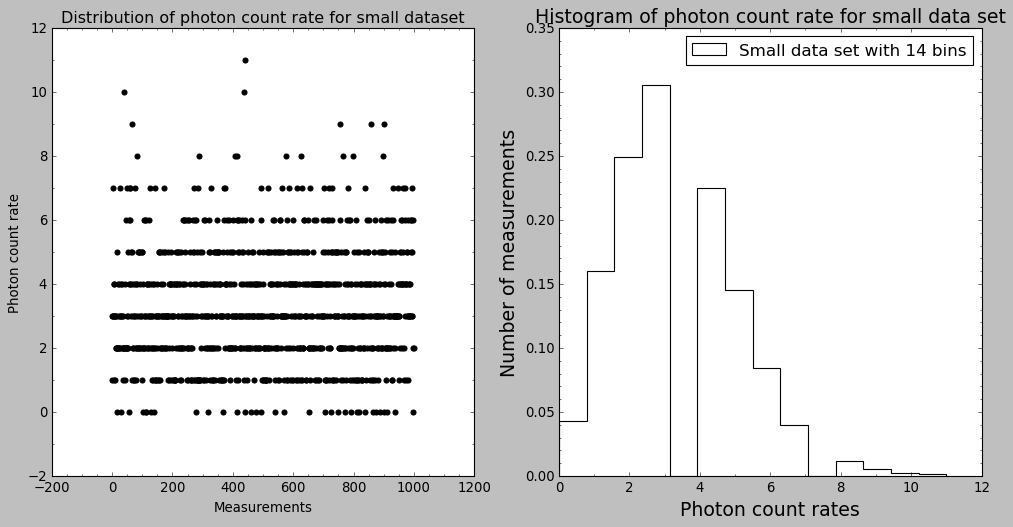

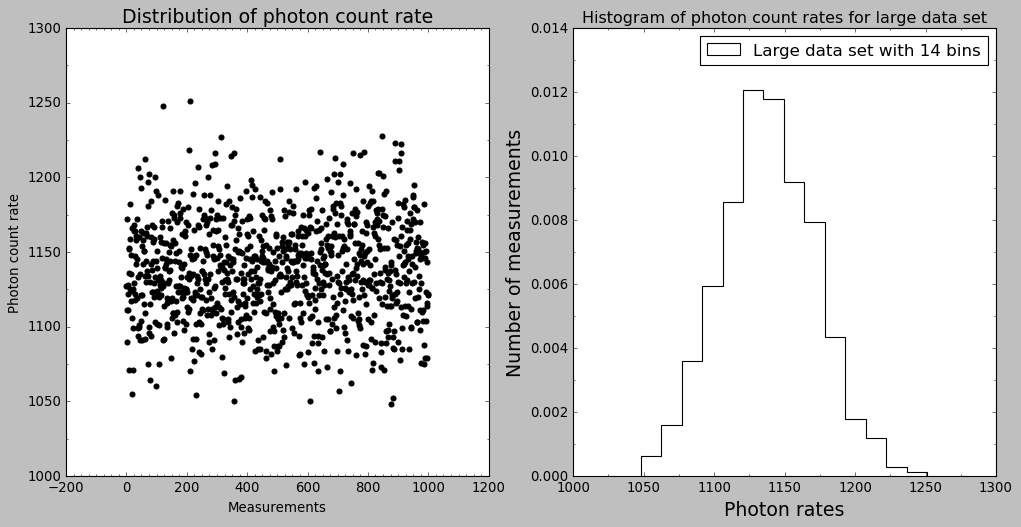

In [5]:
# domains for the small and large datasets for plt.scatter()
small_domain = np.arange(0,len(small_data),1)
large_domain = np.arange(0,len(large_data),1)

# examining data distribution and histogram for the small data set
fig4a,(ax0,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(15,7))

ax0.scatter(small_domain,small_data,color='k')
ax0.set_title('Distribution of photon count rate for small dataset')
ax0.set_xlabel('Measurements')
ax0.set_ylabel('Photon count rate')
ax0.xaxis.set_minor_locator(MultipleLocator(50))
ax0.yaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

ax1.hist(small_data,bins=14,density=True,histtype="step",color='k',label='Small data set with 14 bins')
ax1.set_title('Histogram of photon count rate for small data set',fontsize=text)
ax1.set_xlabel('Photon count rates',fontsize=text)
ax1.set_ylabel('Number of measurements',fontsize=text)
ax1.legend(loc='best',fontsize=legendfont)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')

plt.savefig('Q4_small_dataset.pdf')
plt.show()

# examining data distribution and histogram for large data set
fig4b,(ax0,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(15,7))

ax0.scatter(large_domain,large_data,color='k')
ax0.set_title('Distribution of photon count rate',fontsize=text)
ax0.set_xlabel('Measurements')
ax0.set_ylabel('Photon count rate')
ax0.xaxis.set_minor_locator(MultipleLocator(25))
ax0.yaxis.set_minor_locator(MultipleLocator(25))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

# large data set plotting
ax1.hist(large_data,bins=14,density=True,histtype="step",color='k',label='Large data set with 14 bins')
ax1.set_title('Histogram of photon count rates for large data set')
ax1.set_xlabel('Photon rates',fontsize=text)
ax1.set_ylabel('Number of measurements',fontsize=text)
ax1.legend(loc='best',fontsize=legendfont)
ax1.xaxis.set_minor_locator(MultipleLocator(25))
ax1.yaxis.set_minor_locator(MultipleLocator(0.001))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')

plt.savefig("Q4_large_dataset.pdf")
plt.show()

# the means of these distributions can be roughly estimated by looking at the peak of the hitogram and finding the corresponding
# x value

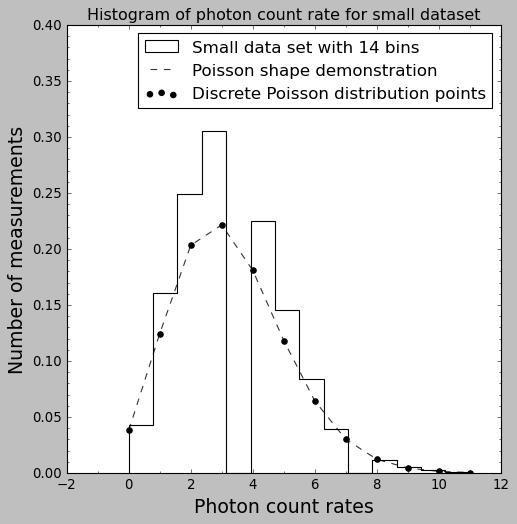

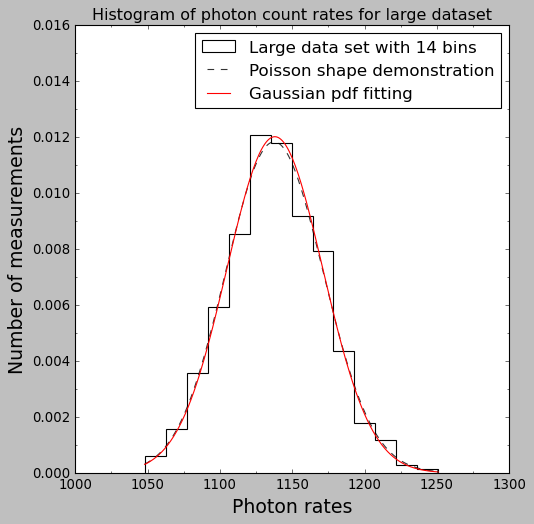

In [6]:
# compare the small dataset with what we expect for the poisson in Fig.3
# call poisson function
small_domain4 = np.arange(0,12,1)
large_domain4 = np.arange(1048,1252,1)
P_smalldist4 = ss.poisson.pmf(small_domain4,mu=3.268)
P_largedist4 = ss.poisson.pmf(large_domain4,mu=1137.97)

# gaussian function for testing the extra plot
Norm_largedata = ss.norm.pdf(large_domain4,loc=1137.97,scale=33.21468)

fig4c,ax0 = plt.subplots(ncols=1,nrows=1,figsize=(7,7))

ax0.hist(small_data,bins=14,density=True,histtype="step",color='k',label='Small data set with 14 bins')
ax0.plot(small_domain4,P_smalldist4,ls='--',color='k',alpha=0.8,label='Poisson shape demonstration')
ax0.scatter(small_domain4,P_smalldist4,s=24,color='k',label='Discrete Poisson distribution points')
ax0.set_title('Histogram of photon count rate for small dataset')
ax0.set_xlabel('Photon count rates',fontsize=text)
ax0.set_ylabel('Number of measurements',fontsize=text)
ax0.set_ylim(0,0.4)
ax0.legend(loc='best')
ax0.legend(loc='upper right',fontsize=legendfont)
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(MultipleLocator(0.01))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

plt.savefig('Q4_smalldata_poissonfitting.pdf')
plt.show()

fig4c_extra,ax0 = plt.subplots(ncols=1,nrows=1,figsize=(7,7))

ax0.hist(large_data,bins=14,density=True,histtype="step",color='k',label='Large data set with 14 bins')
ax0.plot(large_domain4,P_largedist4,ls='--',color='k',alpha=0.8,label='Poisson shape demonstration')
ax0.plot(large_domain4,Norm_largedata,color='r',label='Gaussian pdf fitting')
ax0.set_title('Histogram of photon count rates for large dataset')
ax0.set_xlabel('Photon rates',fontsize=text)
ax0.set_ylabel('Number of measurements',fontsize=text)
ax0.set_ylim(0,0.016)
ax0.legend(loc='best',fontsize=legendfont)
ax0.xaxis.set_minor_locator(MultipleLocator(25))
ax0.yaxis.set_minor_locator(MultipleLocator(0.001))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

plt.savefig('Q4_largedata_poissonfitting_extraplot.pdf')
plt.show()

### Question 5

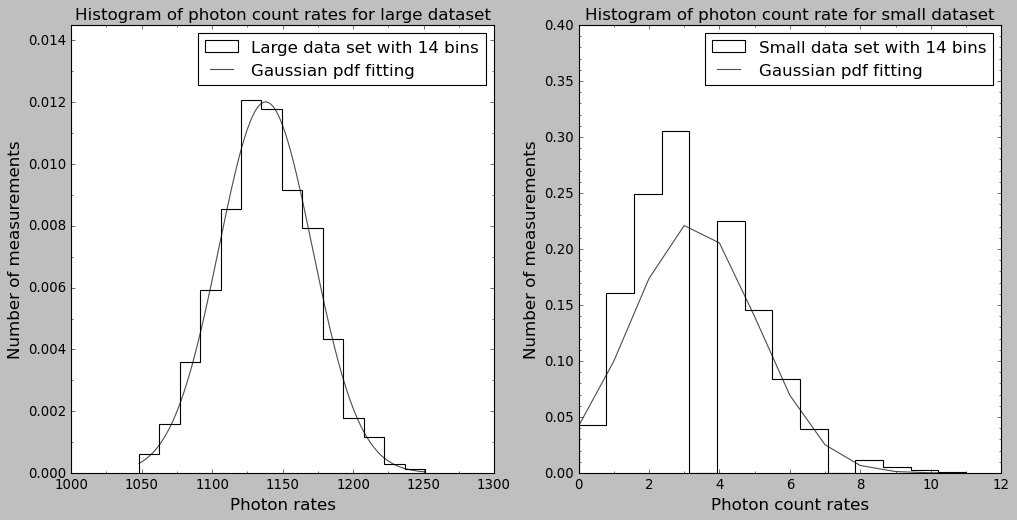

In [7]:
# large data set does indeed look more like a gaussian than the small data set, it appears more symmetric about the mean
# calculate the reduced chi square for gaussian and poisson on the large data set to compare the two fittings
plt.style.use("classic")
tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
text = 15

# setting up the gaussian function
Norm_largedata = ss.norm.pdf(large_domain4,loc=1137.97,scale=33.21468)
Norm_smalldata = ss.norm.pdf(small_domain4,loc=3.268,scale=1.785546)

# small data set plotting
fig,(ax0,ax1) = plt.subplots(ncols=2,nrows=1,figsize=(15,7))

ax0.hist(large_data,bins=14,density=True,histtype="step",color='k',label='Large data set with 14 bins')
ax0.plot(large_domain4,Norm_largedata,color='k',alpha=0.7,label='Gaussian pdf fitting')
ax0.set_title('Histogram of photon count rates for large dataset',fontsize=text)
ax0.set_xlabel('Photon rates',fontsize=text)
ax0.set_ylabel('Number of measurements',fontsize=text)
ax0.set_ylim(0,0.0145)
ax0.legend(loc='best',fontsize=legendfont)
ax0.xaxis.set_minor_locator(MultipleLocator(25))
ax0.yaxis.set_minor_locator(MultipleLocator(0.001))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

ax1.hist(small_data,bins=14,density=True,histtype="step",color='k',label='Small data set with 14 bins')
ax1.plot(small_domain4,Norm_smalldata,color='k',alpha=0.7,label='Gaussian pdf fitting')
ax1.set_title('Histogram of photon count rate for small dataset',fontsize=text)
ax1.set_xlabel('Photon count rates',fontsize=text)
ax1.set_ylabel('Number of measurements',fontsize=text)
ax1.set_ylim(0,0.4)
ax1.legend(loc='best')
ax1.legend(loc='upper right',fontsize=legendfont)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')

plt.savefig('Q5_largedata_gaussianfitting.pdf')
plt.show()

### Question 6

The fitting parameters are [66.14711197] [632.69381533]
The deviation from the fit is 2586.3423965693573
The error for the slope is 1.2734388169705573
The error for the y-int is 843.5326837644809
The reduced chi-square is 0.8461538461538459


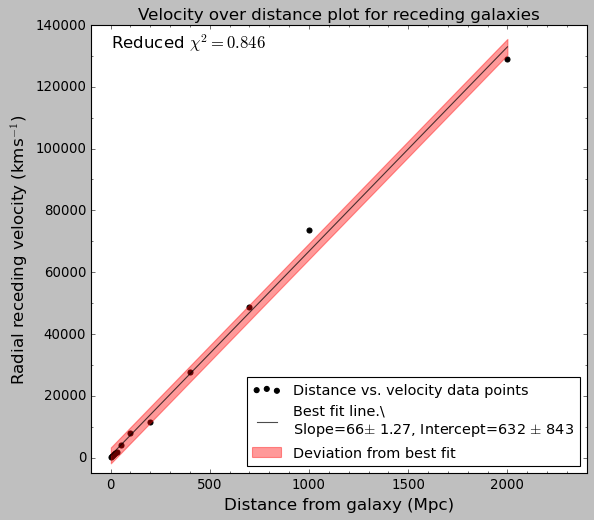

The percent error of the slope is 5.233363938350212


In [8]:
# read in values form the given file
values = np.loadtxt('Irons-ironsrai-Hubble.txt')

# sort the values based on column
distance = []
velocity = []
for d in range(len(values)):
    distance.append(values[d][0])
    velocity.append(values[d][1])
distance = np.array(distance)
velocity = np.array(velocity)

# creating the arrays for curve fitting
N = len(distance)
M1 = [[np.sum(distance**2) , np.sum(distance)] , [np.sum(distance) , N]]
M1_inverse = np.linalg.inv(M1)
M2 = [[np.sum(distance*velocity)] , [np.sum(velocity)]]
[m,c] = np.dot(M1_inverse,M2)
print('The fitting parameters are',m,c)

# calculating errors for the fitting
std_squared = (1/(N-2))*np.sum((velocity - (m[0]*distance + c[0]))**2) # deviations from the fit code
std = np.sqrt(std_squared)
print('The deviation from the fit is',std)
m_std = (N*std_squared)/(N*np.sum(distance**2) - np.sum(distance)**2) # error for the slope
m_std = np.sqrt(m_std)
c_std = (std_squared*np.sum(distance**2))/(N*np.sum(distance**2) - np.sum(distance)**2) # error for the intercept
c_std = np.sqrt(c_std)
print('The error for the slope is',m_std)
print('The error for the y-int is',c_std)

# finding the chi square and chi square reduced for the fit
chisq = chi_square(velocity, m[0]*distance + c[0],std)
chisqreduced = chi_square_reduced(velocity,m[0]*distance + c[0],std,2)
print('The reduced chi-square is',chisqreduced)

fig,ax0 = plt.subplots(ncols=1,nrows=1,figsize=(8,7))

ax0.scatter(distance,velocity,color='k',label='Distance vs. velocity data points')
ax0.plot(distance, m[0]*distance + c[0],color='k',alpha=0.7,label=r'Best fit line.\
Slope=66$\pm$ 1.27, Intercept=632 $\pm$ 843')
ax0.fill_between(distance,m[0]*distance + c[0] + 2586.342,m[0]*distance + c[0] - 2586.342,color='r',alpha=0.4,label='Deviation\
 from best fit')
ax0.set_title('Velocity over distance plot for receding galaxies',fontsize=text)
ax0.set_xlabel('Distance from galaxy (Mpc)',fontsize=text)
ax0.set_ylabel(r'Radial receding velocity (kms$^{-1}$)',fontsize=text)
ax0.set_xlim(-100,2400)
ax0.set_ylim(-5000,140000)
ax0.legend(loc='lower right',fontsize=13)
ax0.text(0,132500,r'Reduced $\chi^2 = 0.846$',fontsize=legendfont)
ax0.xaxis.set_minor_locator(MultipleLocator(100))
ax0.yaxis.set_minor_locator(MultipleLocator(10000))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

plt.savefig("Q6_hubble_const.pdf")
plt.show()

# percent error of fitted hubble constant against the actual hubble constant
percenterr_hubble = abs((m[0] - 69.8 )/69.8)*100
print('The percent error of the slope is',percenterr_hubble)